In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

<br><br>

<!-- BEGIN QUESTION -->

## Introduction about this project <a name="1"></a>
<hr>

_points: 3_

In this project, we will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, we will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


In [2]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- BEGIN QUESTION -->

## Data splitting <a name="2"></a>
<hr>



1. Split the data into train (70%) and test (30%) portions with `random_state=76`.


In [3]:
train_df, test_df = train_test_split(credit_df,test_size = 0.3, random_state = 76)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## EDA (Explanatory Data Analysis) Part <a name="3"></a>
<hr>

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that we find useful, and accompany each one with a sentence explaining it.
3. Summarize we initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

2. For the two visualizations, I think age and limit balance are useful. The limit balance is a right skew shape with mostly people have limit balance around 80000. The age also show a right skew shape with mostly people center at around 30.
For the two summary statistics are that the limit balance has mean value of 167563.508571 and sd of 129919.112502. Also the age has a mean value of 35.412952 and st value of 9.136302. These shows that people in the dataset mostly around age of 35 and has around 160000 balance. This is help us further analyze the predicted target.

3. The dataset contains 30,000 instances and 24 features.
The target variable is "default.payment.next.month", which indicates whether a client will default.
Total 30,000 clients in the dataset;

The average amount of credit card is (NT dollar) 167,484. Minimal amount a credit card can receive is (NT dollar)10000 while max value is (NT dollar)1M

In average, the client who owns a credit card is 35.48 year old in our sample, the yougest age one can get a credit card is 21 while the most senior age is 79.

22.1% of credit card contracts that will default next month
There are no missing values in the dataset, ensuring completeness for all features.
4. Since our prediction is classification problem then accuracy, precision, and f1-score would be useful.

This is a classification problem.

The goal of the model is to predict whether a customer will default on their credit card payment next month (represented by the default.payment.next.month column). This target variable is binary, where 1 indicates default and 0 indicates no default. Since the output is categorical and discrete, the problem is one of classification, not regression.

/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


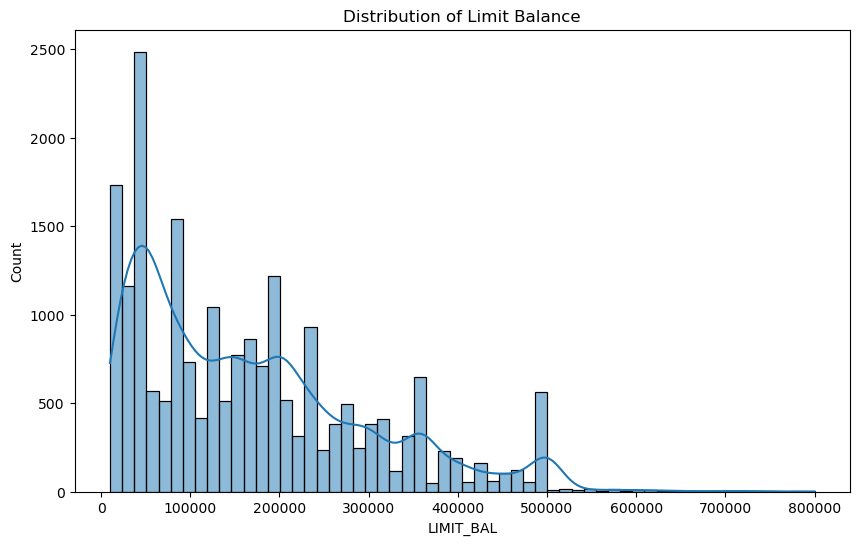

/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


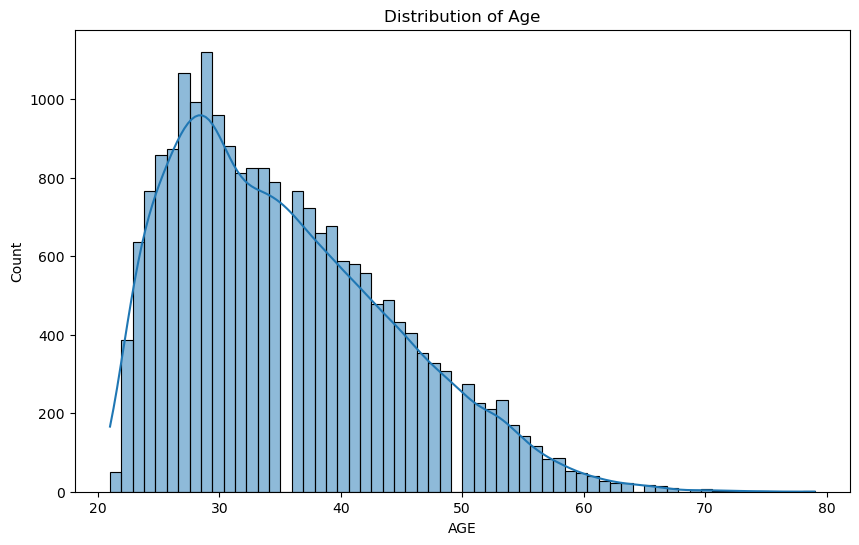

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_df['LIMIT_BAL'], kde=True)
plt.title('Distribution of Limit Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_df['AGE'], kde=True)
plt.title('Distribution of Age')
plt.show()

train_df.info()
train_df.isnull().sum()
train_df.nunique()
train_df.describe()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## Preprocessing and transformations Part <a name="5"></a>
<hr>

1. Identify different feature types and the transformations we would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Define features
numeric_features = ['AGE','LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_features = []
ordinal_features = ['EDUCATION', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
binary_features = ['SEX']
drop_features = ['ID', 'MARRIAGE']
target = "default.payment.next.month"

# Prepare data
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]

# Define transformers
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

binary_transformer = OneHotEncoder(handle_unknown='ignore', drop="if_binary", dtype=int, sparse_output=False)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)
# Define the preprocessor
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),    
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    (SimpleImputer(strategy='most_frequent'), ['MARRIAGE']),  # Impute 'MARRIAGE' with the most frequent category
    ("drop", drop_features),
)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Apply preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)

# Convert the transformed data into a DataFrame for visualization
transformed_df = pd.DataFrame(X_train_transformed)
transformed_df


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.939905,1.327292,0.433921,0.516430,0.390631,0.255174,1.920088,1.212636,0.886674,-0.044007,...,-0.067729,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
1,-0.154656,0.249673,2.094514,1.813839,-0.625196,-0.657545,-0.637820,2.253487,-0.005990,-0.188312,...,0.048752,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
2,-1.030305,-0.674001,0.377072,0.441322,0.396381,0.507760,0.291611,0.330471,-0.172502,-0.135392,...,-0.178386,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
3,1.049361,-0.674001,0.386305,0.456687,0.491731,0.568122,0.679148,0.712040,-0.152181,-0.122640,...,-0.125387,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
4,0.502080,-0.674001,-0.657617,-0.660957,-0.211069,-0.647344,-0.654508,-0.491003,-0.219611,1.085587,...,0.634593,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.720992,-0.135191,-0.543523,-0.605861,-0.586333,-0.559952,-0.354240,-0.419695,0.033853,0.015268,...,0.115961,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
20996,-1.358673,-0.597028,-0.148752,-0.109451,-0.066927,-0.004917,0.060930,0.070064,-0.221766,-0.168623,...,-0.006576,5.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
20997,-0.045200,-0.674001,-0.644758,-0.688462,-0.621334,-0.669689,-0.653316,-0.598245,-0.344926,-0.097052,...,-0.237325,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0
20998,-0.920849,-0.674001,-0.666741,-0.689617,-0.665184,-0.629589,-0.572570,-0.654041,-0.344926,-0.223453,...,0.035648,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## Baseline model Part<a name="6"></a>
<hr>

1. We Try `scikit-learn`'s baseline model and report results.

In [6]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)
from sklearn.dummy import DummyClassifier
results_dict = {}

dummy = DummyClassifier(random_state = 42)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.014 (+/- 0.002),0.004 (+/- 0.000),0.778 (+/- 0.000),0.778 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

## Linear models Part <a name="7"></a>
<hr>

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize the results.

In [7]:
pipe = make_pipeline(preprocessor, LogisticRegression())

# Initialize results_dict if not already done
results_dict = {}

# Add logistic regression results
results_dict["Logistic Regression"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)

# Convert results to DataFrame
income_pred_results_df = pd.DataFrame(results_dict).T
income_pred_results_df

param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

# Initialize an empty dictionary to store results
results_dict = {}

# Iterate over each value of C in the hyperparameter grid
for param in param_grid["C"]:
    model_name = "Logistic Regression"
    pipe = make_pipeline(preprocessor, LogisticRegression(C=param, random_state=42))

    key = model_name + "(C= " + str(param) + ")"
    results_dict[key] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results_dict).T
results_df


/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

,fit_time,score_time,test_score,train_score
Logistic Regression(C= 0.1),0.037 (+/- 0.004),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 1.0),0.041 (+/- 0.007),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 10.0),0.040 (+/- 0.002),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 100.0),0.038 (+/- 0.004),0.004 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)


In [11]:
income_pred_results_df

,fit_time,score_time,test_score,train_score
Logistic Regression(C= 0.1),0.037 (+/- 0.004),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 1.0),0.041 (+/- 0.007),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 10.0),0.040 (+/- 0.002),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 100.0),0.038 (+/- 0.004),0.004 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
decision tree,0.280 (+/- 0.013),0.005 (+/- 0.000),0.719 (+/- 0.006),1.000 (+/- 0.000)
kNN,0.014 (+/- 0.001),0.067 (+/- 0.016),0.796 (+/- 0.003),0.844 (+/- 0.002)
RBF SVM,5.486 (+/- 0.153),1.260 (+/- 0.008),0.818 (+/- 0.004),0.822 (+/- 0.001)


The logistic Regression take around 0.04 for fit time, 0.005 for score time. The test_score is around 0.80 with sd value of 0.0005. The train_score is 0.809 is sd value of 0.0001. Based on the result, the hyperparameter doesn't have significant influence on the train_score and test_score. Based on the result, I choose hyperparameter value of 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## Using Different models <a name="8"></a>
<hr>

1. We Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize the results in terms of overfitting/underfitting and fit and score times.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
models = {
    "decision tree": DecisionTreeClassifier(random_state=42),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=42),
}

income_pred_results_df = None 
# BEGIN SOLUTION
for model_name, model in models.items():
    # print(model_name, ":")
    pipe = make_pipeline(preprocessor, model)
    results_dict[model_name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )
# END SOLUTION

income_pred_results_df = pd.DataFrame(results_dict).T
income_pred_results_df

/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

,fit_time,score_time,test_score,train_score
Logistic Regression(C= 0.1),0.037 (+/- 0.004),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 1.0),0.041 (+/- 0.007),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 10.0),0.040 (+/- 0.002),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 100.0),0.038 (+/- 0.004),0.004 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
decision tree,0.280 (+/- 0.013),0.005 (+/- 0.000),0.719 (+/- 0.006),1.000 (+/- 0.000)
kNN,0.014 (+/- 0.001),0.067 (+/- 0.016),0.796 (+/- 0.003),0.844 (+/- 0.002)
RBF SVM,5.486 (+/- 0.153),1.260 (+/- 0.008),0.818 (+/- 0.004),0.822 (+/- 0.001)


Based on the dataframe, it can show that the decision tree has train_score one 1 which is overfitting. and KNN is relative overfitting. We choose the RBF SVM since the RBF SVM test_score is relative higher than the logistic regreesion. In this way, RBF SVM is a better model compared to logistic regression.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

##Hyperparameter optimization <a name="10"></a>
<hr>



Make some attempts to optimize hyperparameters for the models we've tried and summarize your results. In at least one case we should be optimizing multiple hyperparameters for a single model. we may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

We choose the RBF SVM since the RBF SVM test_score is relative higher than the logistic regreesion.

In [9]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

for param in param_grid["C"]:
    model_name = "RBF SVC"
    pipe = make_pipeline(preprocessor, SVC(C=param))

    key = model_name + "(C= " + str(param) + ")"
    results_dict[key] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )

results_df = pd.DataFrame(results_dict).T
results_df

/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/61/ft8bqly54qb70r_wkxzzrq480000gn/T/ipykernel_42988/2670247526.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

,fit_time,score_time,test_score,train_score
Logistic Regression(C= 0.1),0.037 (+/- 0.004),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 1.0),0.041 (+/- 0.007),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 10.0),0.040 (+/- 0.002),0.005 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
Logistic Regression(C= 100.0),0.038 (+/- 0.004),0.004 (+/- 0.000),0.809 (+/- 0.005),0.809 (+/- 0.001)
decision tree,0.280 (+/- 0.013),0.005 (+/- 0.000),0.719 (+/- 0.006),1.000 (+/- 0.000)
kNN,0.014 (+/- 0.001),0.067 (+/- 0.016),0.796 (+/- 0.003),0.844 (+/- 0.002)
RBF SVM,5.486 (+/- 0.153),1.260 (+/- 0.008),0.818 (+/- 0.004),0.822 (+/- 0.001)
RBF SVC(C= 0.1),5.052 (+/- 0.277),1.294 (+/- 0.011),0.815 (+/- 0.005),0.815 (+/- 0.002)
RBF SVC(C= 1.0),5.466 (+/- 0.078),1.259 (+/- 0.011),0.818 (+/- 0.004),0.822 (+/- 0.001)
RBF SVC(C= 10.0),7.265 (+/- 0.115),1.274 (+/- 0.012),0.818 (+/- 0.005),0.832 (+/- 0.001)


The most optimal RBF SVC hyperparameter value is 1

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## Results on the test set <a name="12"></a>
<hr>

1. Try our best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do we trust your results?

In [10]:
best_C = 1
final_pipeline = make_pipeline(preprocessor, SVC(C=best_C))
final_pipeline.fit(X_train, y_train)
test_score = final_pipeline.score(X_test, y_test)
test_score


0.8193333333333334

- The test results are more or less consistent with the validation results, which is great

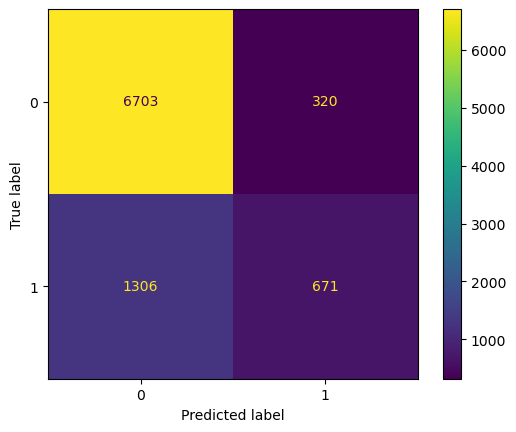

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_pipeline, X_test, y_test);

In [15]:
y_pred = final_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Generate a classification report in dictionary format
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

Accuracy: 0.8193
Precision: 0.6771
Recall: 0.3394
F1 Score: 0.4522


{'0': {'precision': 0.8369334498688975,
  'recall': 0.9544354264559305,
  'f1-score': 0.891830761043108,
  'support': 7023.0},
 '1': {'precision': 0.6770938446014128,
  'recall': 0.33940313606474454,
  'f1-score': 0.45215633423180596,
  'support': 1977.0},
 'accuracy': 0.8193333333333334,
 'macro avg': {'precision': 0.7570136472351552,
  'recall': 0.6469192812603375,
  'f1-score': 0.671993547637457,
  'support': 9000.0},
 'weighted avg': {'precision': 0.8018220165784734,
  'recall': 0.8193333333333334,
  'f1-score': 0.7952489452868919,
  'support': 9000.0}}

The precision is relatively higher than recall, indicating that while the model is good at predicting defaults when it does, it misses many actual default cases.
If the primary concern is to minimize false positives (predicting default when there isn't one), then high precision is favorable. However, if identifying all default cases is crucial, the low recall is problematic.
Overall Performance:

The model has a reasonably good accuracy but struggles with recall.
The low recall and F1 score suggest that the model may not be adequately identifying a substantial number of defaults, which could be problematic in a credit default prediction context where missing defaults could have significant consequences

<!-- END QUESTION -->

<br><br>



## Summary of results <a name="13"></a>
<hr>

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report the final test score along with the metric we used at the top of this notebook in the [Submission instructions section](#si).

In [17]:
import pandas as pd
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Add accuracy separately for clear summary
accuracy = test_score
df_report.loc['accuracy', 'f1-score'] = accuracy

# Display the summary table
print("Summary of Model Performance Metrics")
print(df_report)


Summary of Model Performance Metrics
              precision    recall  f1-score      support
0              0.836933  0.954435  0.891831  7023.000000
1              0.677094  0.339403  0.452156  1977.000000
accuracy       0.819333  0.819333  0.819333     0.819333
macro avg      0.757014  0.646919  0.671994  9000.000000
weighted avg   0.801822  0.819333  0.795249  9000.000000


Concluding Remarks
Based on the metrics obtained, we can draw the following conclusions:

Accuracy: The model achieved an accuracy of 81.93%, which indicates that the model correctly predicts the default status in approximately 82% of the cases. While this is a relatively high accuracy, it is important to consider the balance of precision and recall to fully understand the model's performance.

Precision: The precision score is 67.71%. This means that when the model predicts a default, it is correct about 68% of the time. Precision is crucial in scenarios where false positives (predicting default when there is none) need to be minimized.

Recall: The recall score is 33.94%. This implies that the model is able to identify only about 34% of the actual default cases. Low recall suggests that the model misses a significant number of actual default cases, which could be critical in financial applications.

F1 Score: The F1 score is 45.22%. This metric combines both precision and recall, providing a balanced measure of the model's performance. The relatively low F1 score indicates a trade-off between precision and recall, suggesting room for improvement.

Potential Improvements
Here are some ideas that could potentially improve the performance and interpretability of the model:

Handling Imbalanced Data: The target variable may be imbalanced, with more non-default cases than default cases. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting could help the model focus more on the minority class.

Hyperparameter Tuning: Further fine-tuning of the hyperparameters using techniques such as grid search or randomized search could help optimize the model's performance.

Different Algorithms: Trying other classification algorithms like Random Forest, Gradient Boosting, or Neural Networks could potentially yield better results

<!-- END QUESTION -->

<br><br>